In [1]:
from edc import check_compatibility
check_compatibility("user-0.24.5", dependencies=["SH"])
import os
from oauthlib.oauth2 import BackendApplicationClient
from requests_oauthlib import OAuth2Session
# Your client credentials
client_id = os.environ['SH_CLIENT_ID']
client_secret = os.environ['SH_CLIENT_SECRET']
# Create a session
client = BackendApplicationClient(client_id=client_id)
oauth = OAuth2Session(client=client)
# Get token for the session
token = oauth.fetch_token(token_url='https://services.sentinel-hub.com/oauth/token',
                          client_id=client_id, client_secret=client_secret)
# All requests using this session will have an access token automatically added
resp = oauth.get("https://services.sentinel-hub.com/oauth/tokeninfo")



---------

The following environment variables are available:

* `SH_CLIENT_SECRET`, `SH_CLIENT_NAME`, `SH_INSTANCE_ID`, `SH_CLIENT_ID`


In [2]:
# xcube_sh imports
from xcube_sh.cube import open_cube
from xcube_sh.config import CubeConfig
from xcube_sh.observers import Observers
from xcube_sh.viewer import ViewerServer

# xcube imports
from xcube.core.maskset import MaskSet
from xcube.core.geom import mask_dataset_by_geometry
from xcube.core.geom import clip_dataset_by_geometry

# Various utilities
import json
import numpy as np
import xarray as xr
import shapely.geometry
import IPython.display
import pandas as pd
import matplotlib.pyplot as plt
import zarr
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
#coordinates of the area we analyze
y1 = 29.85
x1 = 32.2
y2 = 31.4
x2 = 32.66
bbox = x1, y1, x2, y2
display_area = IPython.display.GeoJSON(shapely.geometry.box(*bbox).__geo_interface__)

In [4]:
#function creates the graph of the average emissions
def show_average_emission_graph(emission_type, start_date, end_date, time_period):
    global bbox
    cube_config = CubeConfig(dataset_name='sentinel-5p-l2',
                         band_names=[emission_type],
                         geometry=bbox,
                         spatial_res=0.018,
                         time_range=[start_date, end_date],
                         time_period=time_period)
    cube = open_cube(cube_config)
    if emission_type == "NO2": 
        return cube.NO2.mean(dim='time')
    elif emission_type == "SO2":
        return cube.SO2.mean(dim='time')
    

In [5]:
#function creates the timetable of the average emissions
def show_average_emission_table(emission_type, start_date, end_date, time_period):
    global bbox
    cube_config = CubeConfig(dataset_name='sentinel-5p-l2',
                         band_names=[emission_type],
                         geometry=bbox,
                         spatial_res=0.018,
                         time_range=[start_date, end_date],
                         time_period=time_period)
    cube = open_cube(cube_config)
    if emission_type == "NO2": 
        return cube.NO2.mean(dim=("lat","lon"))
    elif emission_type == "SO2":
        return cube.SO2.mean(dim=("lat","lon"))

In [6]:
#main function - can be used to create the graphs as a console user interface
def main():
    user_emission_type = input("which emission type to be analyzed? (NO2 or SO2)")
    user_start_date = input("start date of data collection? (YYYY-MM-DD)")
    user_end_date = input("end date of data collection? (YYYY-MM-DD)")
    user_time_period = input("time period of data collection? (Days)")
    user_time_period = user_time_period + "D"
    fig, axes = plt.subplots(ncols=2)
    graph = show_average_emission_graph(user_emission_type, user_start_date, user_end_date, user_time_period).plot(vmax=1.5e-4, cmap='jet', ax=axes[0])
    timetable = show_average_emission_timetable(user_emission_type, user_start_date, user_end_date, user_time_period).plot(ax=axes[1], ylim=(0,1.5e-4))
    plt.tight_layout()
    plt.draw()

In [7]:
print('area to analyse (suez canal)')
display_area


area to analyse (suez canal)


<IPython.display.GeoJSON object>

which emission type to be analyzed? (NO2 or SO2) NO2
start date of data collection? (YYYY-MM-DD) 2019-06-01
end date of data collection? (YYYY-MM-DD) 2019-09-01
time period of data collection? (Days) 2


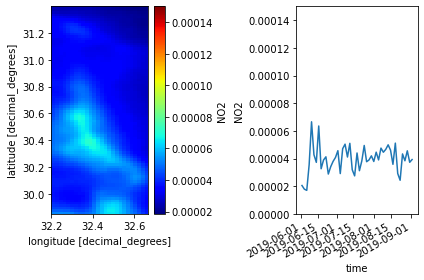

In [8]:
#summer 2019
main()

which emission type to be analyzed? (NO2 or SO2) NO2
start date of data collection? (YYYY-MM-DD) 2019-12-01
end date of data collection? (YYYY-MM-DD) 2020-03-01
time period of data collection? (Days) 2


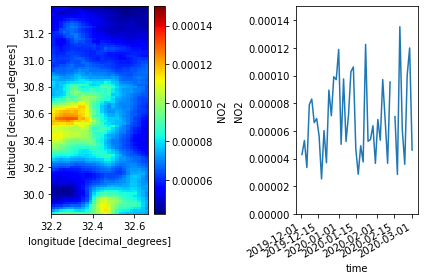

In [9]:
#winter 2019-2020
main()


which emission type to be analyzed? (NO2 or SO2) NO2
start date of data collection? (YYYY-MM-DD) 2020-06-01
end date of data collection? (YYYY-MM-DD) 2020-09-01
time period of data collection? (Days) 2


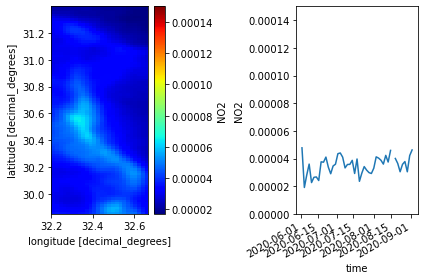

In [10]:
#summer 2020
main()

which emission type to be analyzed? (NO2 or SO2) NO2
start date of data collection? (YYYY-MM-DD) 2020-12-01
end date of data collection? (YYYY-MM-DD) 2021-03-01
time period of data collection? (Days) 2


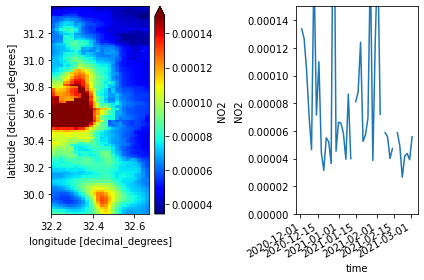

In [11]:
#winter 2020-2021
main()